In [2]:
import os

import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
# Set current working directory
os.chdir("/import/home2/yhchenmath/Code/project5472/")
root_dir = "/import/home2/yhchenmath/Dataset/stitch3D/AdultMouseBrain/"

# Preprocessing

## ST

In [14]:
count = pd.read_csv(f"{root_dir}ST/GSE147747_expr_raw_counts_table.tsv", sep="\t", index_col=0)
meta = pd.read_csv(f"{root_dir}ST/GSE147747_meta_table.tsv", sep="\t", index_col=0)

In [15]:
count

,Gnai3,Cdc45,Scml2,Apoh,Narf,Cav2,Klf6,Scmh1,Cox5a,Tbx2,...,Gm17056,Platr19,Olfr457,Defa2,Olfr628,Gm16982,Mir155hg,X6430562O15Rik,Olfr1386,RP24.502E20.6
02A_15.8x13.04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02A_18.75x13.07,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
02A_16.74x13.07,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02A_17.81x13.08,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02A_19.96x14.09,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19B_25.89x31.16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19B_13.88x31.17,0,0,0,0,0,1,0,2,4,0,...,0,0,0,0,0,0,0,0,0,0
19B_22.94x31.18,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19B_17.81x31.18,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
adata_st_all = ad.AnnData(X=count.values)
adata_st_all.obs.index = count.index
adata_st_all.obs = meta.loc[adata_st_all.obs.index]
adata_st_all.var.index = count.columns

In [17]:
adata_st_all.obs

,section_index,stereo_ML,stereo_DV,stereo_AP,HE_X,HE_Y,ABA_acronym,ABA_name,ABA_parent,nuclei_segmented,spot_radius,passed_QC,cluster_id,cluster_name
02A_15.8x13.04,02A,3.156438,-3.545032,2.245,4315.484,3479.641,MOp1,"Primary motor area, Layer 1",Isocortex,3,72.832245,True,52.0,Mixed-06 (fiber tracts)
02A_18.75x13.07,02A,3.012475,-2.692800,2.245,5177.835,3491.171,MOp1,"Primary motor area, Layer 1",Isocortex,1,76.475977,True,21.0,Isocortex-09
02A_16.74x13.07,02A,3.124975,-3.292800,2.245,4590.964,3488.927,MOp1,"Primary motor area, Layer 1",Isocortex,1,75.797361,True,21.0,Isocortex-09
02A_17.81x13.08,02A,3.064854,-2.974134,2.245,4903.852,3493.646,MOp1,"Primary motor area, Layer 1",Isocortex,5,73.206277,True,21.0,Isocortex-09
02A_19.96x14.09,02A,2.831225,-2.405300,2.245,5531.016,3783.901,MOp1,"Primary motor area, Layer 1",Isocortex,2,77.408797,True,21.0,Isocortex-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19B_25.89x31.16,19B,-0.050847,-6.664022,-1.655,7250.293,8739.657,V3,third ventricle,ventricular systems,6,72.741943,True,103.0,Hypothalamus-06
19B_13.88x31.17,19B,0.074500,-3.032232,-1.655,3751.029,8741.631,MH,Medial habenula,Thalamus,7,74.423269,True,144.0,Thalamus-12
19B_22.94x31.18,19B,-0.025500,-5.804300,-1.655,6390.434,8745.601,V3,third ventricle,ventricular systems,11,78.192133,True,92.0,Hypothalamus-05
19B_17.81x31.18,19B,0.049112,-4.383160,-1.655,4895.830,8746.422,IMD,Intermediodorsal nucleus of the thalamus,Thalamus,6,72.953735,True,135.0,Thalamus-11


In [18]:
slice_use = ['01A', '02A', '03A', '04B', '05A', '06B', '07A', '08B', '09A', '10B',
 '11A', '12A', '13B', '14A', '15A', '16A', '17A', '18A', '19A', '20B',
 '21A', '22A', '23A', '24A', '25A', '26A', '27A', '28A', '29A', '30A',
 '31A', '32A', '33A', '34A', '35A',]
meta_slice = pd.read_csv(f"{root_dir}ST/figures/slicestable.tsv",
                        index_col=0, sep="\t")

In [19]:
meta_slice

,slice_old_id,AP,animal,rotation
01A,ID9_C1,2.945,A2,90
01B,ID9_C2,2.945,A2,90
02A,ID1_D1,2.245,A1,-90
02B,ID1_D2,2.245,A1,-90
03A,ID1_E1,1.945,A1,-90
...,...,...,...,...
38B,ID13_E2,-5.255,A3,0
39A,ID14_C1,-5.380,A3,90
39B,ID14_C2,-5.380,A3,90
40A,ID14_D1,-5.455,A3,90


In [20]:
slice_AP = [float(meta_slice.loc[s]['AP']) * 1000 for s in slice_use]
slice_dist_micron = [-(slice_AP[i+1] - slice_AP[i]) for i in range(len(slice_AP)-1)]
adata_st_all = adata_st_all[[s in slice_use for s in adata_st_all.obs.section_index.values]]
sc.pp.filter_cells(adata_st_all, min_genes=1)

Trying to set attribute `.obs` of view, copying.


In [39]:
adata_st_all.obsm['spatial'] = np.concatenate((adata_st_all.obs['HE_X'].values.reshape(-1, 1),
                                               adata_st_all.obs['HE_Y'].values.reshape(-1, 1)), axis=1)
adata_st_list_raw = []

for slice_id in sorted(set(adata_st_all.obs.section_index.values)):
    adata_st_i = adata_st_all[adata_st_all.obs.section_index.values == slice_id]

    array_col = np.array([np.float(loc.split("_")[1].split("x")[0]) for loc in adata_st_i.obs.index])
    if slice_id == '01A':
        array_col = array_col - 0.3
    array_row = np.array([np.float(loc.split("_")[1].split("x")[1]) for loc in adata_st_i.obs.index])

    adata_st_i.obs['array_col'] = np.round(array_col)
    adata_st_i.obs['array_row'] = np.round(array_row)
    adata_st_i.obsm['loc_use'] = np.concatenate((adata_st_i.obs['array_row'].values.reshape(-1, 1),
                                                 adata_st_i.obs['array_col'].values.reshape(-1, 1)), axis=1)

    adata_st_list_raw.append(adata_st_i.copy())

for i in range(1, 6): # adjust spatial locations
    adata_st_list_raw[i].obsm['loc_use'] = np.concatenate((adata_st_list_raw[i].obsm['loc_use'][:, 0].reshape(-1, 1),
                                                           2*np.mean(adata_st_list_raw[i].obsm['loc_use'][:, 1])-adata_st_list_raw[i].obsm['loc_use'][:, 1].reshape(-1, 1)), axis=1)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attrib

## scRNA

In [27]:
adata_ref = ad.read_h5ad(f"{root_dir}SC/all_cells_20200625.h5ad")
adata_ref.var.index = adata_ref.var["SYMBOL"].astype(str)
adata_ref.var_names_make_unique()
labels = pd.read_csv(f"{root_dir}SC/snRNA_annotation_astro_subtypes_refined59_20200823.csv", index_col=0)

labels = labels.reindex(index=adata_ref.obs_names)
adata_ref.obs[labels.columns] = labels
adata_ref = adata_ref[~adata_ref.obs['annotation_1'].isna(), :]
adata_ref.obs['celltype'] = adata_ref.obs['annotation_1']

Trying to set attribute `.obs` of view, copying.


In [58]:
adata_ref.obs['celltype']

5705STDY8058283_AAACCCAAGCCTATTG-1           Ext_L23
5705STDY8058283_AAACCCAAGGTCATAA-1           Oligo_2
5705STDY8058283_AAACCCACAACCCTCT-1           Oligo_2
5705STDY8058283_AAACCCAGTGCTATTG-1    Astro_THAL_med
5705STDY8058283_AAACCCAGTTCACCGG-1           Inh_Sst
                                           ...      
5705STDY8058280_TTTGTTGCAGAGTGAC-1             Micro
5705STDY8058280_TTTGTTGCATCGCTCT-1           Oligo_2
5705STDY8058280_TTTGTTGGTATGGTAA-1       Inh_Meis2_3
5705STDY8058280_TTTGTTGGTGTAGTGG-1           Oligo_2
5705STDY8058280_TTTGTTGGTTAGGCCC-1            LowQ_2
Name: celltype, Length: 40532, dtype: object

## Save in pickle

In [42]:
# Save adata_st_list_raw and adata_ref in pickle
import pickle
with open(f"{root_dir}process/st_data.pickle", 'wb') as f:
    pickle.dump(adata_st_list_raw, f)
with open(f"{root_dir}process/sc_data.pickle", 'wb') as f:
    pickle.dump(adata_ref, f)
with open(f"{root_dir}process/para_dict.pickle", 'wb') as f:
    pickle.dump({"preprocess": {"slice_dist_micron": slice_dist_micron},
                 "align": {}
                 }, f)

In [21]:
# Load adata_st_list_raw and adata_ref from pickle
import pickle
with open(f"{root_dir}process/st_data.pickle", 'rb') as f:
    adata_st_list_raw = pickle.load(f)
with open(f"{root_dir}process/sc_data.pickle", 'rb') as f:
    adata_ref = pickle.load(f)
with open(f"{root_dir}process/para_dict.pickle", 'rb') as f:
    para_dict = pickle.load(f)


## Alignment

In [22]:
adata_st_list_raw

[AnnData object with n_obs × n_vars = 152 × 23371
     obs: 'section_index', 'stereo_ML', 'stereo_DV', 'stereo_AP', 'HE_X', 'HE_Y', 'ABA_acronym', 'ABA_name', 'ABA_parent', 'nuclei_segmented', 'spot_radius', 'passed_QC', 'cluster_id', 'cluster_name', 'n_genes', 'array_col', 'array_row'
     obsm: 'spatial', 'loc_use',
 AnnData object with n_obs × n_vars = 240 × 23371
     obs: 'section_index', 'stereo_ML', 'stereo_DV', 'stereo_AP', 'HE_X', 'HE_Y', 'ABA_acronym', 'ABA_name', 'ABA_parent', 'nuclei_segmented', 'spot_radius', 'passed_QC', 'cluster_id', 'cluster_name', 'n_genes', 'array_col', 'array_row'
     obsm: 'spatial', 'loc_use',
 AnnData object with n_obs × n_vars = 269 × 23371
     obs: 'section_index', 'stereo_ML', 'stereo_DV', 'stereo_AP', 'HE_X', 'HE_Y', 'ABA_acronym', 'ABA_name', 'ABA_parent', 'nuclei_segmented', 'spot_radius', 'passed_QC', 'cluster_id', 'cluster_name', 'n_genes', 'array_col', 'array_row'
     obsm: 'spatial', 'loc_use',
 AnnData object with n_obs × n_vars = 32

In [23]:
adata_ref

AnnData object with n_obs × n_vars = 40532 × 31053
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'sample', 'barcode', 'annotation_1', 'celltype'
    var: 'feature_types', 'genome', 'SYMBOL', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt'

In [24]:
adata = adata_st_list_raw[0]
loc_x = adata.obs.loc[:, ["array_row"]]
loc_y = adata.obs.loc[:, ["array_col"]]
loc = np.concatenate((loc_x, loc_y), axis=1)
pairwise_loc_distsq = np.sum((loc.reshape([1,-1,2]) - loc.reshape([-1,1,2])) ** 2, axis=2)

In [25]:
min_distsq = np.sort(np.unique(pairwise_loc_distsq), axis=None)[1]
n_neighbors = np.sum(pairwise_loc_distsq < (min_distsq * 3), axis=1) - 1
edge = ((n_neighbors > 1) & (n_neighbors < 7)).astype(np.float32)

In [26]:
from utils.alignment import align_slice
# A logger using logger.info() to print messages in Jupyter notebook
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

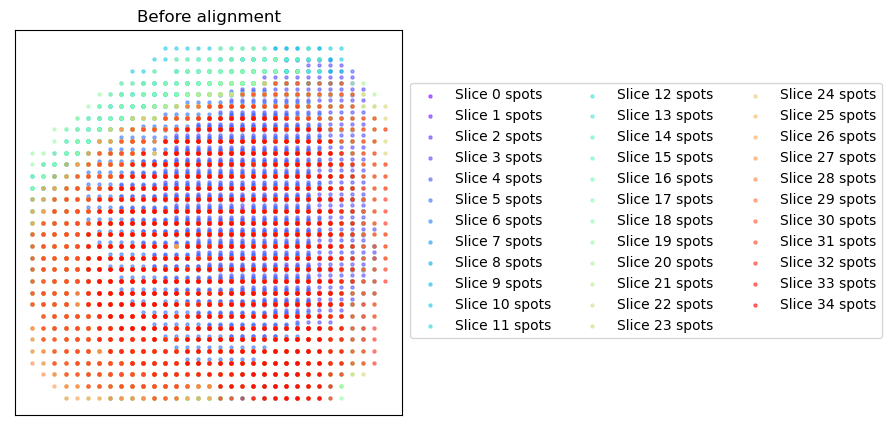

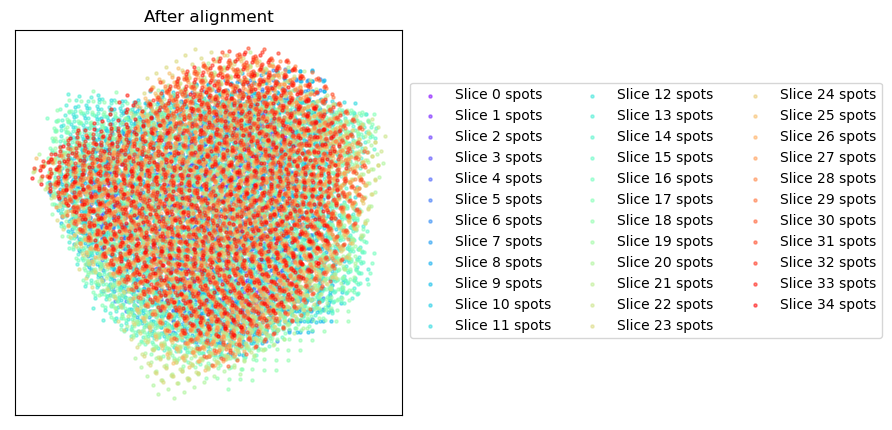

In [27]:
aligned_st = align_slice(logger, adata_st_list_raw, coor_key="loc_use", tol=1e-3)

In [28]:
adata_ref.var

,feature_types,genome,SYMBOL,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,mt
SYMBOL,,,,,,,,,,
Xkr4,Gene Expression,mm10-3.0.0_premrna,Xkr4,6618,6.008789e-03,5.990808e-03,99.902603,40829.0,10.617172,False
Gm1992,Gene Expression,mm10-3.0.0_premrna,Gm1992,2974,1.003844e-03,1.003341e-03,99.956232,6821.0,8.827908,False
Gm37381,Gene Expression,mm10-3.0.0_premrna,Gm37381,30,4.415089e-06,4.415079e-06,99.999558,30.0,3.433987,False
Rp1,Gene Expression,mm10-3.0.0_premrna,Rp1,201,3.061129e-05,3.061082e-05,99.997042,208.0,5.342334,False
Sox17,Gene Expression,mm10-3.0.0_premrna,Sox17,1,1.471696e-07,1.471696e-07,99.999985,1.0,0.693147,False
...,...,...,...,...,...,...,...,...,...,...
AC168977.1,Gene Expression,mm10-3.0.0_premrna,AC168977.1,5,7.358482e-07,7.358479e-07,99.999926,5.0,1.791759,False
AC149090.1,Gene Expression,mm10-3.0.0_premrna,AC149090.1,3513,1.081550e-03,1.080965e-03,99.948299,7349.0,8.902455,False
CAAA01118383.1,Gene Expression,mm10-3.0.0_premrna,CAAA01118383.1,841,1.334829e-04,1.334739e-04,99.987623,907.0,6.811244,False


In [29]:
aligned_st[0].obsm["spatial_aligned"]

array([[20., 20.],
       [20., 21.],
       [20., 19.],
       [20., 18.],
       [21., 21.],
       [21., 22.],
       [21., 20.],
       [21., 17.],
       [21., 19.],
       [21., 16.],
       [21., 18.],
       [22., 17.],
       [22., 22.],
       [22., 16.],
       [22., 20.],
       [22., 19.],
       [22., 18.],
       [23., 20.],
       [23., 19.],
       [23., 21.],
       [23., 15.],
       [23., 16.],
       [23., 17.],
       [23., 22.],
       [23., 23.],
       [23., 24.],
       [23., 18.],
       [24., 21.],
       [24., 22.],
       [24., 23.],
       [24., 20.],
       [24., 17.],
       [24., 15.],
       [24., 24.],
       [24., 16.],
       [24., 19.],
       [24., 14.],
       [24., 26.],
       [24., 25.],
       [24., 18.],
       [25., 20.],
       [25., 22.],
       [25., 21.],
       [25., 19.],
       [25., 24.],
       [25., 15.],
       [25., 23.],
       [25., 27.],
       [25., 14.],
       [25., 17.],
       [25., 26.],
       [25., 25.],
       [25.,

In [30]:
adata_ref.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,mt_frac,sample,barcode,annotation_1,celltype
5705STDY8058283_AAACCCAAGCCTATTG-1,4124,8.324821,12107.0,9.401622,29.916577,36.218716,44.106715,56.512761,0.000743,5705STDY8058283,AAACCCAAGCCTATTG-1,Ext_L23,Ext_L23
5705STDY8058283_AAACCCAAGGTCATAA-1,1393,7.239933,2516.0,7.830823,32.074722,38.672496,47.694754,64.507154,0.000397,5705STDY8058283,AAACCCAAGGTCATAA-1,Oligo_2,Oligo_2
5705STDY8058283_AAACCCACAACCCTCT-1,1591,7.372746,2888.0,7.968666,28.531856,35.491690,44.736842,62.222992,0.001039,5705STDY8058283,AAACCCACAACCCTCT-1,Oligo_2,Oligo_2
5705STDY8058283_AAACCCAGTGCTATTG-1,928,6.834109,1502.0,7.315218,31.890812,39.480692,51.531292,71.504660,0.000000,5705STDY8058283,AAACCCAGTGCTATTG-1,Astro_THAL_med,Astro_THAL_med
5705STDY8058283_AAACCCAGTTCACCGG-1,3131,8.049427,6945.0,8.845922,25.874730,32.210223,39.928006,53.794096,0.001296,5705STDY8058283,AAACCCAGTTCACCGG-1,Inh_Sst,Inh_Sst
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705STDY8058280_TTTGTTGCAGAGTGAC-1,794,6.678342,1008.0,6.916715,19.841270,29.761905,41.071429,70.833333,0.000000,5705STDY8058280,TTTGTTGCAGAGTGAC-1,Micro,Micro
5705STDY8058280_TTTGTTGCATCGCTCT-1,1254,7.134891,2132.0,7.665285,31.378987,38.461538,47.936210,64.634146,0.000000,5705STDY8058280,TTTGTTGCATCGCTCT-1,Oligo_2,Oligo_2
5705STDY8058280_TTTGTTGGTATGGTAA-1,2248,7.718241,4941.0,8.505526,28.637928,35.559603,44.687310,59.947379,0.000607,5705STDY8058280,TTTGTTGGTATGGTAA-1,Inh_Meis2_3,Inh_Meis2_3
5705STDY8058280_TTTGTTGGTGTAGTGG-1,769,6.646391,1275.0,7.151485,35.686275,43.529412,55.372549,78.901961,0.000000,5705STDY8058280,TTTGTTGGTGTAGTGG-1,Oligo_2,Oligo_2


In [31]:
from utils.preprocess import preprocess
adata_st, adata_basis = preprocess(logger, aligned_st, adata_ref, sample_col="sample",
                                                  coor_key="loc_use", slice_dist_micron=slice_dist_micron,
                                                  c2c_dist=200.,
                                                  n_hvg_group=500)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attrib

6 batches are used for computing the basis vector of cell type <Astro_AMY>.
6 batches are used for computing the basis vector of cell type <Astro_AMY_CTX>.
6 batches are used for computing the basis vector of cell type <Astro_CTX>.
6 batches are used for computing the basis vector of cell type <Astro_HPC>.
6 batches are used for computing the basis vector of cell type <Astro_HYPO>.
4 batches are used for computing the basis vector of cell type <Astro_STR>.
5 batches are used for computing the basis vector of cell type <Astro_THAL_hab>.
6 batches are used for computing the basis vector of cell type <Astro_THAL_lat>.
6 batches are used for computing the basis vector of cell type <Astro_THAL_med>.
6 batches are used for computing the basis vector of cell type <Astro_WM>.
4 batches are used for computing the basis vector of cell type <Endo>.
6 batches are used for computing the basis vector of cell type <Ext_Amy_1>.
6 batches are used for computing the basis vector of cell type <Ext_Amy_2>

In [48]:
adata_st

array([[20.        , 20.        ,  0.        ],
       [20.        , 21.        ,  0.        ],
       [20.        , 19.        ,  0.        ],
       ...,
       [16.48066103, 23.19974645, 39.        ],
       [25.55070397, 31.05686558, 39.        ],
       [17.23649794, 23.85450638, 39.        ]])

In [33]:
adata_basis

View of AnnData object with n_obs × n_vars = 59 × 6227

,section_index,stereo_ML,stereo_DV,stereo_AP,HE_X,HE_Y,ABA_acronym,ABA_name,ABA_parent,nuclei_segmented,spot_radius,passed_QC,cluster_id,cluster_name,n_genes,array_col,array_row,slice,batch,library_size
01A_20.48x20.11-slice0,01A,2.378607,-3.415027,2.945,5504.581,5517.352,MOs1,"Secondary motor area, layer 1",Isocortex,3,70.358752,True,52.0,Mixed-06 (fiber tracts),1710,20.0,20.0,0,0,1285.0
01A_21.45x20.11-slice0,01A,2.365025,-3.635800,2.945,5779.690,5519.214,MOs1,"Secondary motor area, layer 1",Isocortex,4,72.165739,False,NaN,NaN,907,21.0,20.0,0,0,540.0
01A_19.34x20.15-slice0,01A,2.408775,-3.179550,2.945,5184.702,5529.663,MOs1,"Secondary motor area, layer 1",Isocortex,2,71.001744,True,52.0,Mixed-06 (fiber tracts),1737,19.0,20.0,0,0,1250.0
01A_18.37x20.18-slice0,01A,2.445953,-2.968610,2.945,4909.038,5537.582,MOs1,"Secondary motor area, layer 1",Isocortex,1,69.533822,True,15.0,Mixed-01 (Isocortex),1418,18.0,20.0,0,0,926.0
01A_21.44x21.14-slice0,01A,2.149380,-3.602695,2.945,5776.840,5815.605,MOs2/3,"Secondary motor area, layer 2/3",Isocortex,9,73.352980,True,2.0,Isocortex-01,2824,21.0,21.0,0,0,2540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35A_14.81x29.15-slice34,35A,0.190575,-2.227175,-4.855,4012.049,8132.592,PAG,Periaqueductal gray,Midbrain,11,71.035520,True,63.0,Midbrain-06,4348,15.0,29.0,34,1,4585.0
35A_9.87x29.15-slice34,35A,0.164161,-1.126077,-4.855,2575.837,8131.720,SCzo,"Superior colliculus, zonal layer",Midbrain,7,69.366691,True,14.0,Midbrain-02,3874,10.0,29.0,34,1,3623.0
35A_23.97x29.15-slice34,35A,0.034325,-5.052175,-4.855,6674.851,8131.316,CSl,"Superior central nucleus raphe, lateral part",Hindbrain,6,68.873110,True,6.0,Midbrain-01,3608,24.0,29.0,34,1,3331.0
35A_11.99x29.18-slice34,35A,0.161486,-1.579101,-4.855,3193.878,8140.090,SCig,"Superior colliculus, motor related, intermedia...",Midbrain,8,71.926263,True,14.0,Midbrain-02,3886,12.0,29.0,34,1,3682.0
